# 사용 파이썬 점검

In [1]:
import sys
sys.version

'3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import site
site.getsitepackages()

['d:\\ProgramData\\Anaconda3',
 'd:\\ProgramData\\Anaconda3\\Lib\\site-packages']

In [3]:
import matplotlib as mpl
print(mpl.__version__)

import numpy as np
print(np.__version__)

3.7.1
1.24.3


#### matplotlib 선명하게

In [37]:
%config InlineBackend.figure_format = 'retina'

#### 한글 처리

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

# lecture 28

## Series of pandas

In [12]:
import pandas as pd

a = pd.Series([3, 5.6, 7, 9], name='basic')

In [13]:
print(a.name)
print(a.values)
print(a.index)

basic
[3.  5.6 7.  9. ]
RangeIndex(start=0, stop=4, step=1)


In [15]:
import pandas as pd

a = pd.Series([3, -5.6, 7, 9], index=list('abcd'), name='basic')
a

a    3.0
b   -5.6
c    7.0
d    9.0
Name: basic, dtype: float64

In [16]:
print(a.name)
print(a.values)
print(a.index)

basic
[ 3.  -5.6  7.   9. ]
Index(['a', 'b', 'c', 'd'], dtype='object')


## DataFrame of pandas

In [20]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20260102"),
        "C": np.arange(0, 4, .5),
        "D": np.array([3] * 8, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]*2),
        "F": "foo",
    }, index=pd.date_range("20250101", periods=8)
)
df

,A,B,C,D,E,F
2025-01-01,1.0,2026-01-02,0.0,3,test,foo
2025-01-02,1.0,2026-01-02,0.5,3,train,foo
2025-01-03,1.0,2026-01-02,1.0,3,test,foo
2025-01-04,1.0,2026-01-02,1.5,3,train,foo
2025-01-05,1.0,2026-01-02,2.0,3,test,foo
2025-01-06,1.0,2026-01-02,2.5,3,train,foo
2025-01-07,1.0,2026-01-02,3.0,3,test,foo
2025-01-08,1.0,2026-01-02,3.5,3,train,foo


In [21]:
df.index


DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [24]:
df.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

In [25]:
df.to_numpy()

array([[1.0, Timestamp('2026-01-02 00:00:00'), 0.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 0.5, 3, 'train', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 1.5, 3, 'train', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 2.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 2.5, 3, 'train', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 3.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2026-01-02 00:00:00'), 3.5, 3, 'train', 'foo']],
      dtype=object)

In [26]:
df.describe()

,A,C,D
count,8.0,8.000000,8.0
mean,1.0,1.750000,3.0
std,0.0,1.224745,0.0
min,1.0,0.000000,3.0
25%,1.0,0.875000,3.0
50%,1.0,1.750000,3.0
75%,1.0,2.625000,3.0
max,1.0,3.500000,3.0


In [27]:
df.T

,2025-01-01,2025-01-02,2025-01-03,2025-01-04,2025-01-05,2025-01-06,2025-01-07,2025-01-08
A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
B,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00,2026-01-02 00:00:00
C,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5
D,3,3,3,3,3,3,3,3
E,test,train,test,train,test,train,test,train
F,foo,foo,foo,foo,foo,foo,foo,foo


In [29]:
df.sort_index(axis=1)

,A,B,C,D,E,F
2025-01-01,1.0,2026-01-02,0.0,3,test,foo
2025-01-02,1.0,2026-01-02,0.5,3,train,foo
2025-01-03,1.0,2026-01-02,1.0,3,test,foo
2025-01-04,1.0,2026-01-02,1.5,3,train,foo
2025-01-05,1.0,2026-01-02,2.0,3,test,foo
2025-01-06,1.0,2026-01-02,2.5,3,train,foo
2025-01-07,1.0,2026-01-02,3.0,3,test,foo
2025-01-08,1.0,2026-01-02,3.5,3,train,foo


In [30]:
df.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
2025-01-01,foo,test,3,0.0,2026-01-02,1.0
2025-01-02,foo,train,3,0.5,2026-01-02,1.0
2025-01-03,foo,test,3,1.0,2026-01-02,1.0
2025-01-04,foo,train,3,1.5,2026-01-02,1.0
2025-01-05,foo,test,3,2.0,2026-01-02,1.0
2025-01-06,foo,train,3,2.5,2026-01-02,1.0
2025-01-07,foo,test,3,3.0,2026-01-02,1.0
2025-01-08,foo,train,3,3.5,2026-01-02,1.0


In [33]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D,E,F
2025-01-08,1.0,2026-01-02,3.5,3,train,foo
2025-01-07,1.0,2026-01-02,3.0,3,test,foo
2025-01-06,1.0,2026-01-02,2.5,3,train,foo
2025-01-05,1.0,2026-01-02,2.0,3,test,foo
2025-01-04,1.0,2026-01-02,1.5,3,train,foo
2025-01-03,1.0,2026-01-02,1.0,3,test,foo
2025-01-02,1.0,2026-01-02,0.5,3,train,foo
2025-01-01,1.0,2026-01-02,0.0,3,test,foo


In [32]:
df.sort_values(by="C", ascending=False)

,A,B,C,D,E,F
2025-01-08,1.0,2026-01-02,3.5,3,train,foo
2025-01-07,1.0,2026-01-02,3.0,3,test,foo
2025-01-06,1.0,2026-01-02,2.5,3,train,foo
2025-01-05,1.0,2026-01-02,2.0,3,test,foo
2025-01-04,1.0,2026-01-02,1.5,3,train,foo
2025-01-03,1.0,2026-01-02,1.0,3,test,foo
2025-01-02,1.0,2026-01-02,0.5,3,train,foo
2025-01-01,1.0,2026-01-02,0.0,3,test,foo


In [34]:
df.sort_values(by="E")

,A,B,C,D,E,F
2025-01-01,1.0,2026-01-02,0.0,3,test,foo
2025-01-03,1.0,2026-01-02,1.0,3,test,foo
2025-01-05,1.0,2026-01-02,2.0,3,test,foo
2025-01-07,1.0,2026-01-02,3.0,3,test,foo
2025-01-02,1.0,2026-01-02,0.5,3,train,foo
2025-01-04,1.0,2026-01-02,1.5,3,train,foo
2025-01-06,1.0,2026-01-02,2.5,3,train,foo
2025-01-08,1.0,2026-01-02,3.5,3,train,foo


In [62]:
dates = pd.date_range("20250101", periods=6)
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06'],
              dtype='datetime64[ns]', freq='D')

In [64]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2025-01-01,0.451876,0.459365,-2.225319,0.340266
2025-01-02,0.026665,-0.633883,1.284943,0.212373
2025-01-03,0.981792,-0.564594,0.468629,-1.648908
2025-01-04,-0.729781,-0.293376,0.100614,1.145208
2025-01-05,0.173258,-0.770047,-0.195097,0.711790
2025-01-06,-0.431266,0.131990,-0.958977,0.935328


In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20250101", periods=6))
s1


2025-01-01    1
2025-01-02    2
2025-01-03    3
2025-01-04    4
2025-01-05    5
2025-01-06    6
Freq: D, dtype: int64

In [50]:
df["F"] = s1
df

,A,B,C,D,F
2025-01-01,-0.031224,0.785531,0.192394,-0.452696,1
2025-01-02,-0.970433,1.683700,0.649518,0.502665,2
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3
2025-01-04,-1.525344,0.023947,-0.157183,2.280636,4
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6


In [60]:
s2 = pd.Series([1, 2, 3, 4, 5, 6])
s2

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [61]:
df["G"] = s2
df

,A,B,C,D,F,G
2025-01-01,-0.031224,0.785531,0.192394,-0.452696,1,NaN
2025-01-02,-0.970433,1.683700,0.649518,0.502665,2,NaN
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3,NaN
2025-01-04,-1.525344,0.023947,-0.157183,2.280636,4,NaN
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5,NaN
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6,NaN


In [51]:
df[df.A > 0]

,A,B,C,D,F
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6


In [53]:
df2 = df.copy()
df2

,A,B,C,D,F
2025-01-01,-0.031224,0.785531,0.192394,-0.452696,1
2025-01-02,-0.970433,1.683700,0.649518,0.502665,2
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3
2025-01-04,-1.525344,0.023947,-0.157183,2.280636,4
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6


In [55]:
df2['E'] = ['one','one', 'two','three','four','three']
df2

,A,B,C,D,F,E
2025-01-01,-0.031224,0.785531,0.192394,-0.452696,1,one
2025-01-02,-0.970433,1.683700,0.649518,0.502665,2,one
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3,two
2025-01-04,-1.525344,0.023947,-0.157183,2.280636,4,three
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5,four
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6,three


In [57]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,F,E
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3,two
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5,four


In [58]:
df2

,A,B,C,D,F,E
2025-01-01,-0.031224,0.785531,0.192394,-0.452696,1,one
2025-01-02,-0.970433,1.683700,0.649518,0.502665,2,one
2025-01-03,0.836719,0.975550,1.461757,-0.789831,3,two
2025-01-04,-1.525344,0.023947,-0.157183,2.280636,4,three
2025-01-05,0.176289,1.980561,0.293979,-1.628462,5,four
2025-01-06,0.356121,1.089422,-0.705456,-1.467717,6,three


### 행 추가

In [111]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randint(1, 11, (8, 4)))
df

,0,1,2,3
0,10,7,7,5
1,3,2,8,6
2,8,10,10,8
3,7,2,3,1
4,9,3,7,5
5,7,1,3,1
6,6,6,9,3
7,3,9,10,3


In [107]:
df.append({0:10, 1:20, 2:30, 3:40}, ignore_index=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_22984\2047427324.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({0:10, 1:20, 2:30, 3:40}, ignore_index=True)


,0,1,2,3
0,2,3,2,3
1,7,6,9,5
2,4,4,8,2
3,6,4,4,10
4,9,4,2,7
5,1,2,5,4
6,4,3,2,8
7,9,10,9,1
8,10,20,30,40


In [113]:
new_df = pd.DataFrame(np.arange(10, 41, 10).reshape(1, 4))
# new_df = pd.DataFrame(np.arange(10, 41, 10))
pd.concat([df, new_df], ignore_index=True)

,0,1,2,3
0,10,7,7,5
1,3,2,8,6
2,8,10,10,8
3,7,2,3,1
4,9,3,7,5
5,7,1,3,1
6,6,6,9,3
7,3,9,10,3
8,10,20,30,40


In [109]:
df

,0,1,2,3
0,2,3,2,3
1,7,6,9,5
2,4,4,8,2
3,6,4,4,10
4,9,4,2,7
5,1,2,5,4
6,4,3,2,8
7,9,10,9,1


In [110]:
df.loc[len(df)] = [10, 20, 30, 40]
df

,0,1,2,3
0,2,3,2,3
1,7,6,9,5
2,4,4,8,2
3,6,4,4,10
4,9,4,2,7
5,1,2,5,4
6,4,3,2,8
7,9,10,9,1
8,10,20,30,40


In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randint(1, 11, (8, 4)), index=list('abcdefgh'))
df

,0,1,2,3
a,10,3,6,7
b,5,10,1,2
c,2,7,3,4
d,5,1,8,2
e,3,4,8,5
f,8,2,6,1
g,4,3,7,4
h,3,8,3,1


In [4]:
import numpy as np
import pandas as pd

new_df = pd.DataFrame(np.arange(10, 41, 10).reshape(1, 4))
pd.concat([df, new_df], ignore_index=True)

,0,1,2,3
0,10,3,6,7
1,5,10,1,2
2,2,7,3,4
3,5,1,8,2
4,3,4,8,5
5,8,2,6,1
6,4,3,7,4
7,3,8,3,1
8,10,20,30,40


In [5]:
df

,0,1,2,3
a,10,3,6,7
b,5,10,1,2
c,2,7,3,4
d,5,1,8,2
e,3,4,8,5
f,8,2,6,1
g,4,3,7,4
h,3,8,3,1


In [8]:
df.loc[len(df)] = [10, 20, 30, 40]
df

,0,1,2,3
a,10,3,6,7
b,5,10,1,2
c,2,7,3,4
d,5,1,8,2
e,3,4,8,5
f,8,2,6,1
g,4,3,7,4
h,3,8,3,1
8,10,20,30,40
9,10,20,30,40


In [13]:
df.loc[3] = [1, 2, 3, 4]
df

,0,1,2,3
a,10,3,6,7
b,5,10,1,2
c,2,7,3,4
d,5,1,8,2
e,3,4,8,5
f,8,2,6,1
g,4,3,7,4
h,3,8,3,1
8,10,20,30,40
9,10,20,30,40


In [14]:
df[3]

a      7
b      2
c      4
d      2
e      5
f      1
g      4
h      1
8     40
9     40
10    40
3      4
Name: 3, dtype: int64

# lecture 29

## 인터넷 자료로 데이터 분석

In [141]:
import pandas as pd

# df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table')
df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
print(df)

[             국가 (IOC 코드)  하계 참가 횟수  Unnamed: 2  Unnamed: 3  Unnamed: 4      계  \
0           아프가니스탄 (AFG)        14           0           0           2      2   
1              알제리 (ALG)        13           5           4           8     17   
2            아르헨티나 (ARG)        24          21          25          28     74   
3            아르메니아 (ARM)         6           2           6           6     14   
4    오스트랄라시아 (ANZ) [ANZ]         2           3           4           5     12   
..                   ...       ...         ...         ...         ...    ...   
148       독립 (IOA) [IOA]         3           1           0           1      2   
149    독립 참가 (IOP) [IOP]         1           0           1           2      3   
150  러시아 출신 올림픽 선수 (OAR)         0           0           0           0      0   
151       혼성 (ZZX) [ZZX]         3           8           5           4     17   
152                   총합        28        5116        5082        5490  15688   

     동계 참가 횟수  Unnamed: 7 

In [142]:
print(type(df))
print(type(df[0]))

<class 'list'>
<class 'pandas.core.frame.DataFrame'>


In [143]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df[0]

,국가 (IOC 코드),하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
151,혼성 (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


In [ ]:
df[1] # 두 번째 데이터프레임

,국가 (IOC 코드),하계 참가 횟수,동계 참가 횟수,전체 참가 횟수
0,알바니아 (ALB),8,4,12
1,아메리칸사모아 (ASA),8,1,9
2,안도라 (AND),11,12,23
3,앙골라 (ANG),9,0,9
4,앤티가 바부다 (ANT),10,0,10
...,...,...,...,...
74,중화민국 (ROC) [ROC],3,0,3
75,자르 (SAA) [SAA],1,0,1
76,북예멘 (YAR) [YAR],2,0,2
77,에멘 인민 민주 공화국 (YMD) [YMD],1,0,1


In [144]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df[0]

,국가 (IOC 코드),하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
0,아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
149,독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
150,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17
151,혼성 (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


In [145]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df2 = df[0].set_index('국가 (IOC 코드)')
df2

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계,동계 참가 횟수,Unnamed: 7,Unnamed: 8,Unnamed: 9,계.1,전체 참가 횟수,Unnamed: 12,Unnamed: 13,Unnamed: 14,총합
국가 (IOC 코드),,,,,,,,,,,,,,,
아프가니스탄 (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
알제리 (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
아르메니아 (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0,1,2,6,9,17,1,2,6,9,17


In [146]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df2 = df[0].set_index('국가 (IOC 코드)')

summer = df2.iloc[:, :5]
summer

,하계 참가 횟수,Unnamed: 2,Unnamed: 3,Unnamed: 4,계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


In [147]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df2 = df[0].set_index('국가 (IOC 코드)')

summer = df2.iloc[:, :5]
summer.columns = ['경기수', '금', '은', '동', '합계']
summer

,경기수,금,은,동,합계
국가 (IOC 코드),,,,,
아프가니스탄 (AFG),14,0,0,2,2
알제리 (ALG),13,5,4,8,17
아르헨티나 (ARG),24,21,25,28,74
아르메니아 (ARM),6,2,6,6,14
오스트랄라시아 (ANZ) [ANZ],2,3,4,5,12
...,...,...,...,...,...
독립 (IOA) [IOA],3,1,0,1,2
독립 참가 (IOP) [IOP],1,0,1,2,3
러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


In [148]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df2 = df[0].set_index('국가 (IOC 코드)')

summer = df2.iloc[:, :5]
summer.columns = ['경기수', '금', '은', '동', '합계']
summer = summer.sort_values('금', ascending=False)
summer

,경기수,금,은,동,합계
국가 (IOC 코드),,,,,
총합,28,5116,5082,5490,15688
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523
소련 (URS) [URS],9,395,319,296,1010
영국 (GBR) [GBR] [Z],28,263,295,293,851
중화인민공화국 (CHN) [CHN],10,224,167,155,546
...,...,...,...,...,...
레바논 (LIB),17,0,2,2,4
세르비아 몬테네그로 (SCG) [SCG],1,0,2,0,2
지부티 (DJI) [B],8,0,0,1,1


In [149]:
summer.head(20)

,경기수,금,은,동,합계
국가 (IOC 코드),,,,,
총합,28,5116,5082,5490,15688
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523
소련 (URS) [URS],9,395,319,296,1010
영국 (GBR) [GBR] [Z],28,263,295,293,851
중화인민공화국 (CHN) [CHN],10,224,167,155,546
프랑스 (FRA) [O] [P] [Z],28,212,241,263,716
이탈리아 (ITA) [M] [S],27,206,178,193,577
독일 (GER) [GER] [Z],16,191,194,230,615
헝가리 (HUN),26,175,147,169,491


In [150]:
import pandas as pd

df = pd.read_html('https://ko.wikipedia.org/wiki/%EC%98%AC%EB%A6%BC%ED%94%BD_%EB%A9%94%EB%8B%AC_%EC%A7%91%EA%B3%84')
df2 = df[0].set_index('국가 (IOC 코드)')

summer = df2.iloc[:, :5]
summer.columns = ['경기수', '금', '은', '동', '합계']
summer = summer.sort_values('금', ascending=False)
summer.to_excel('하계올림픽메달.xlsx')

### 엑셀 데이터 읽어와 특정 문구가 있는 열 검색

In [17]:
import pandas as pd

df = pd.read_excel('하계올림픽메달.xlsx', index_col=0)
df.head()

,경기수,금,은,동,합계
국가 (IOC 코드),,,,,
총합,28,5116,5082,5490,15688
미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523
소련 (URS) [URS],9,395,319,296,1010
영국 (GBR) [GBR] [Z],28,263,295,293,851
중화인민공화국 (CHN) [CHN],10,224,167,155,546


In [18]:
import pandas as pd

df = pd.read_excel('하계올림픽메달.xlsx')
df.head()

,국가 (IOC 코드),경기수,금,은,동,합계
0,총합,28,5116,5082,5490,15688
1,미국 (USA) [P] [Q] [R] [Z] [F],27,1022,795,706,2523
2,소련 (URS) [URS],9,395,319,296,1010
3,영국 (GBR) [GBR] [Z],28,263,295,293,851
4,중화인민공화국 (CHN) [CHN],10,224,167,155,546


In [19]:
df['국가 (IOC 코드)'] == '대한민국 (KOR)'

0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
150    False
151    False
152    False
Name: 국가 (IOC 코드), Length: 153, dtype: bool

In [152]:
df[df['국가 (IOC 코드)'] == '대한민국 (KOR)']

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


In [153]:
df.loc[df['국가 (IOC 코드)'] == '대한민국 (KOR)']

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


In [155]:
df['국가 (IOC 코드)'].isin(['대한민국 (KOR)'])

0      False
1      False
2      False
3      False
4      False
       ...  
148    False
149    False
150    False
151    False
152    False
Name: 국가 (IOC 코드), Length: 153, dtype: bool

In [156]:
df[df['국가 (IOC 코드)'].isin(['대한민국 (KOR)'])]

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


In [157]:
df.loc[df['국가 (IOC 코드)'].isin(['대한민국 (KOR)'])]

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


### '국가 (IOC 코드)’ 열에서 '대한민국’ 등 부분 문자열이 있는 행 검색 출력

In [158]:
df[df['국가 (IOC 코드)'].str.contains('대한민국')]

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


In [159]:
df[df['국가 (IOC 코드)'].str.contains('KOR')]

,국가 (IOC 코드),경기수,금,은,동,합계
15,대한민국 (KOR),17,90,87,90,267


In [160]:
df[df['국가 (IOC 코드)'].str.contains('러시아')]

,국가 (IOC 코드),경기수,금,은,동,합계
10,러시아 (RUS) [RUS],6,148,125,153,426
86,러시아 제국 (RU1) [RU1],3,1,4,3,8
110,러시아 출신 올림픽 선수 (OAR),0,0,0,0,0


### pandas 복습 

In [ ]:
import pandas as pd
import numpy as np
data = np.random.randint(1, 11, (3, 4))
df = pd.DataFrame(data=data, index=pd.date_range('2024-01-01', periods=3),
             columns=list('ABCD'))
df

,A,B,C,D
2024-01-01,1,3,5,10
2024-01-02,7,1,3,7
2024-01-03,1,2,1,1


In [ ]:
df.loc['2024-01-01'] # 행 참조

A     1
B     3
C     5
D    10
Name: 2024-01-01 00:00:00, dtype: int32

In [ ]:
df.iloc[0] # 인덱스로 행 참조

A     1
B     3
C     5
D    10
Name: 2024-01-01 00:00:00, dtype: int32

In [ ]:
df.iloc[:2] # 스라이스로 여러 행 참조

,A,B,C,D
2024-01-01,1,3,5,10
2024-01-02,7,1,3,7


In [ ]:
df['A'] # 열 참조

2024-01-01    1
2024-01-02    7
2024-01-03    1
Freq: D, Name: A, dtype: int32

In [ ]:
df[['A', 'C']] # 여러 열 참조

,A,C
2024-01-01,1,5
2024-01-02,7,3
2024-01-03,1,1


In [ ]:
df.iloc[:2, :2] # 행과 열 참조

,A,B
2024-01-01,1,3
2024-01-02,7,1


In [ ]:
df.loc[:'2024-01-03', ['A', 'C']] # 행과 열 참조

,A,C
2024-01-01,1,5
2024-01-02,7,3
2024-01-03,1,1


In [ ]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 |  

In [ ]:
import pandas as pd
index = pd.date_range('1/1/2000', periods =8)
print(index)


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
import numpy as np
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df


,A,B,C
2000-01-01,0.787491,0.879948,0.414125
2000-01-02,0.508607,0.627245,0.777799
2000-01-03,0.640463,0.959108,0.450354
2000-01-04,0.339663,0.503510,0.225138
2000-01-05,0.537657,0.445594,0.440391
2000-01-06,0.403598,0.851672,0.535862
2000-01-07,0.392208,0.094177,0.326447
2000-01-08,0.893683,0.897150,0.745366


In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
print(df['B'])


2000-01-01    0.495681
2000-01-02    0.346761
2000-01-03    0.139682
2000-01-04    0.310157
2000-01-05    0.473675
2000-01-06    0.189386
2000-01-07    0.994337
2000-01-08    0.240227
Freq: D, Name: B, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
print(df['B'] > 0.4)


2000-01-01    False
2000-01-02     True
2000-01-03    False
2000-01-04    False
2000-01-05     True
2000-01-06     True
2000-01-07     True
2000-01-08    False
Freq: D, Name: B, dtype: bool


In [ ]:
df2 = df[df['B'] > 0.4]
df2


,A,B,C
2000-01-02,0.062478,0.403256,0.266009
2000-01-05,0.177481,0.782236,0.095809
2000-01-06,0.057774,0.791222,0.616911
2000-01-07,0.278904,0.570485,0.174513


In [ ]:
df2 = df2.T
df2


,2000-01-02 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
A,0.062478,0.177481,0.057774,0.278904
B,0.403256,0.782236,0.791222,0.570485
C,0.266009,0.095809,0.616911,0.174513


In [ ]:
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df['D'] = df['A'] / df['B']  # A열의 값을 B열의 값으로 나눈 값을 D열에 저장
df


,A,B,C,D
2000-01-01,0.089535,0.132215,0.008221,0.677191
2000-01-02,0.928804,0.063635,0.106798,14.595876
2000-01-03,0.744430,0.650706,0.160228,1.144034
2000-01-04,0.440706,0.789465,0.438534,0.558233
2000-01-05,0.348013,0.929291,0.816379,0.374493
2000-01-06,0.145619,0.911867,0.720240,0.159694
2000-01-07,0.743066,0.383810,0.818719,1.936023
2000-01-08,0.189450,0.490409,0.819463,0.386310


In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)  #행 우선 계산 값을 E 열에 저장
df.head()


,A,B,C,D,E
2000-01-01,0.512792,0.263039,0.055812,1.949494,2.781137
2000-01-02,0.500368,0.406405,0.630317,1.231205,2.768295
2000-01-03,0.999056,0.241426,0.874995,4.138151,6.253628
2000-01-04,0.589256,0.069358,0.009147,8.495827,9.163588
2000-01-05,0.614074,0.857050,0.410267,0.716497,2.597888


In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)
df = df.sub(df['A'], axis =0)  #A열의 데이터를 기준으로 열 우선 계산
df.head()


,A,B,C,D,E
2000-01-01,0.0,-0.252760,-0.490689,0.344119,2.588588
2000-01-02,0.0,0.314134,0.219832,0.163453,1.091236
2000-01-03,0.0,0.350632,0.269399,0.156014,1.280889
2000-01-04,0.0,-0.223294,-0.423193,1.031734,2.140913
2000-01-05,0.0,-0.380552,-0.804960,0.789750,2.358656


In [ ]:
import pandas as pd
import numpy as np
index = pd.date_range('1/1/2000', periods =8)
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] = np.sum(df, axis = 1)
df = df.sub(df['A'], axis =0)  
df = df.div(df['C'], axis = 0)   #C열의 데이터를 기준으로 열 우선 계산
df.to_csv('test.csv')
df.head()


,A,B,C,D,E
2000-01-01,0.0,0.094047,1.0,2.193355,4.109886
2000-01-02,-0.0,1.085101,1.0,-5.972568,-7.881735
2000-01-03,-0.0,-3.329721,1.0,-2.641668,-16.580616
2000-01-04,-0.0,0.585471,1.0,-3.789456,-6.538788
2000-01-05,-0.0,-5.961930,1.0,-0.118850,-11.125495


# lecture 30


## 판다스로 인구구조 분석

In [114]:
import pandas as pd

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df.head()

,2023년09월_계_총인구수,2023년09월_계_연령구간인구수,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"9,407,540","9,407,540","38,101","41,599","43,518","44,893","48,097","51,107","56,215","64,176",...,"8,984","6,319","5,441","4,430","3,158","2,286","1,306",916,703,"1,505"
서울특별시 종로구 (1111000000),"139,945","139,945",397,470,463,524,516,578,670,778,...,172,146,110,93,71,55,36,21,16,39
서울특별시 종로구 청운효자동(1111051500),"11,391","11,391",35,45,46,47,50,47,76,86,...,14,14,7,8,4,5,3,1,3,3
서울특별시 종로구 사직동(1111053000),"9,042","9,042",24,32,35,37,40,49,56,60,...,8,15,10,16,5,5,2,5,2,5
서울특별시 종로구 삼청동(1111054000),"2,252","2,252",7,4,8,7,4,9,13,10,...,7,3,5,1,2,1,1,0,0,2


In [115]:
import pandas as pd

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df.dtypes

2023년09월_계_총인구수       object
2023년09월_계_연령구간인구수    object
2023년09월_계_0세         object
2023년09월_계_1세         object
2023년09월_계_2세         object
                       ...  
2023년09월_계_96세        object
2023년09월_계_97세        object
2023년09월_계_98세        object
2023년09월_계_99세         int64
2023년09월_계_100세 이상    object
Length: 103, dtype: object

In [116]:
import pandas as pd

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.replace(',', '', regex=True) # 옵션 regex=True 주어야함
df.head()

,2023년09월_계_총인구수,2023년09월_계_연령구간인구수,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9407540,9407540,38101,41599,43518,44893,48097,51107,56215,64176,...,8984,6319,5441,4430,3158,2286,1306,916,703,1505
서울특별시 종로구 (1111000000),139945,139945,397,470,463,524,516,578,670,778,...,172,146,110,93,71,55,36,21,16,39
서울특별시 종로구 청운효자동(1111051500),11391,11391,35,45,46,47,50,47,76,86,...,14,14,7,8,4,5,3,1,3,3
서울특별시 종로구 사직동(1111053000),9042,9042,24,32,35,37,40,49,56,60,...,8,15,10,16,5,5,2,5,2,5
서울특별시 종로구 삼청동(1111054000),2252,2252,7,4,8,7,4,9,13,10,...,7,3,5,1,2,1,1,0,0,2


In [117]:
import pandas as pd

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.replace(',', '', regex=True)

df = df.apply(pd.to_numeric)
df.dtypes

2023년09월_계_총인구수       int64
2023년09월_계_연령구간인구수    int64
2023년09월_계_0세         int64
2023년09월_계_1세         int64
2023년09월_계_2세         int64
                      ...  
2023년09월_계_96세        int64
2023년09월_계_97세        int64
2023년09월_계_98세        int64
2023년09월_계_99세        int64
2023년09월_계_100세 이상    int64
Length: 103, dtype: object

In [120]:
df.columns[0]

'2023년09월_계_총인구수'

In [20]:
import pandas as pd

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df = df.replace(',', '', regex=True)

df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
df.head(3)

,2023년09월_계_총인구수,2023년09월_계_연령구간인구수,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),1.0,1.0,0.004050,0.004422,0.004626,0.004772,0.005113,0.005433,0.005976,0.006822,...,0.000955,0.000672,0.000578,0.000471,0.000336,0.000243,0.000139,0.000097,0.000075,0.000160
서울특별시 종로구 (1111000000),1.0,1.0,0.002837,0.003358,0.003308,0.003744,0.003687,0.004130,0.004788,0.005559,...,0.001229,0.001043,0.000786,0.000665,0.000507,0.000393,0.000257,0.000150,0.000114,0.000279
서울특별시 종로구 청운효자동(1111051500),1.0,1.0,0.003073,0.003950,0.004038,0.004126,0.004389,0.004126,0.006672,0.007550,...,0.001229,0.001229,0.000615,0.000702,0.000351,0.000439,0.000263,0.000088,0.000263,0.000263


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

df.head(3)


,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,2023년09월_계_8세,2023년09월_계_9세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.004050,0.004422,0.004626,0.004772,0.005113,0.005433,0.005976,0.006822,0.007074,0.007078,...,0.000955,0.000672,0.000578,0.000471,0.000336,0.000243,0.000139,0.000097,0.000075,0.000160
서울특별시 종로구 (1111000000),0.002837,0.003358,0.003308,0.003744,0.003687,0.004130,0.004788,0.005559,0.005681,0.005981,...,0.001229,0.001043,0.000786,0.000665,0.000507,0.000393,0.000257,0.000150,0.000114,0.000279
서울특별시 종로구 청운효자동(1111051500),0.003073,0.003950,0.004038,0.004126,0.004389,0.004126,0.006672,0.007550,0.007550,0.007462,...,0.001229,0.001229,0.000615,0.000702,0.000351,0.000439,0.000263,0.000088,0.000263,0.000263


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') # 원하는 지역 이름 입력
df2 = df[df.index.str.contains(name)] #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2

,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,2023년09월_계_8세,2023년09월_계_9세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 구로구 신도림동(1153051000),0.006206,0.007016,0.007128,0.007296,0.008582,0.007631,0.008442,0.010259,0.011489,0.010846,...,0.000559,0.000391,0.000168,0.000335,0.000307,0.000168,0.000168,0.000196,0.0,0.000112


In [23]:
df2.T

행정구역,서울특별시 구로구 신도림동(1153051000)
2023년09월_계_0세,0.006206
2023년09월_계_1세,0.007016
2023년09월_계_2세,0.007128
2023년09월_계_3세,0.007296
2023년09월_계_4세,0.008582
...,...
2023년09월_계_96세,0.000168
2023년09월_계_97세,0.000168
2023년09월_계_98세,0.000196
2023년09월_계_99세,0.000000


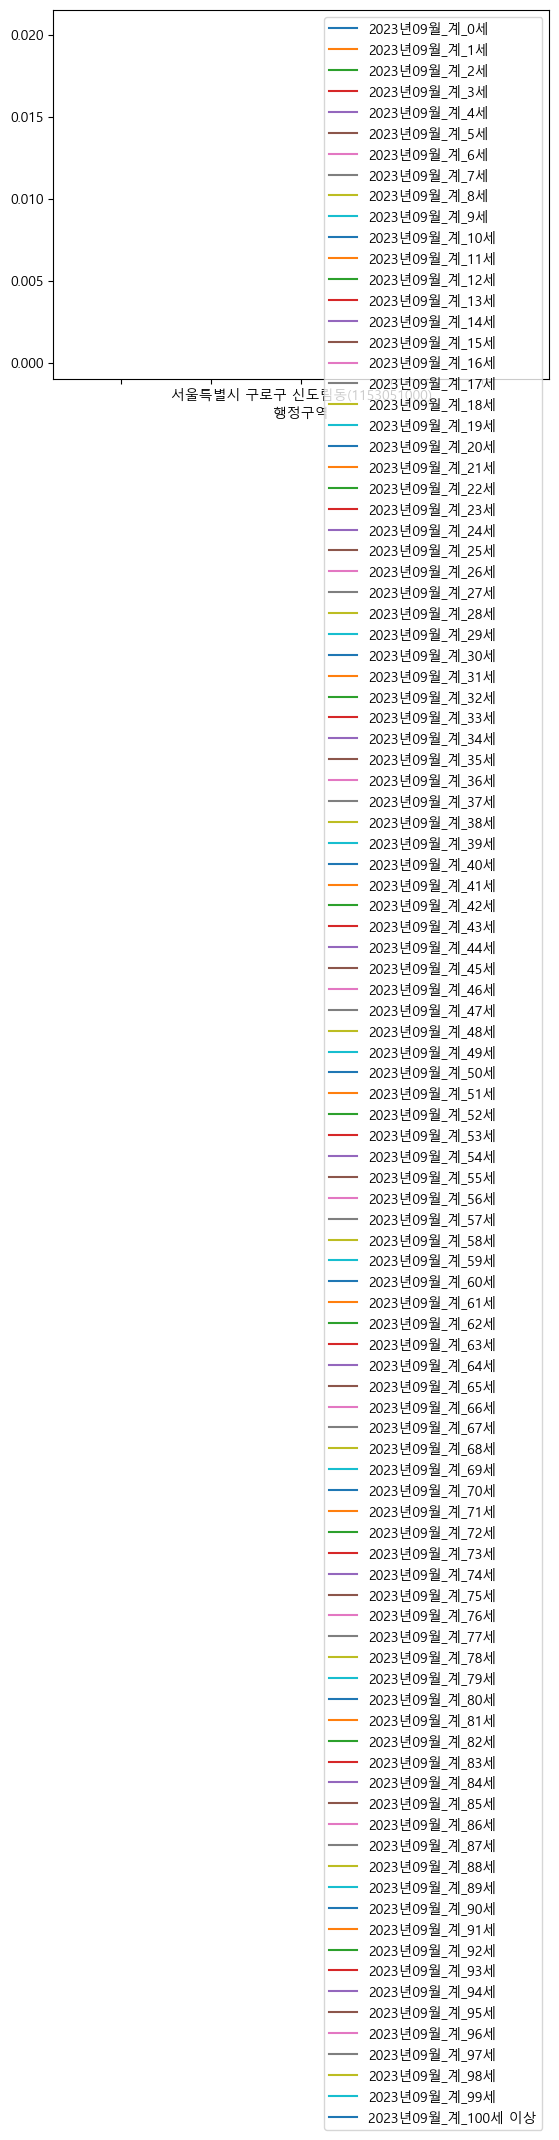

In [128]:
# 데이터프레임을 전치(transpose)하지 않으면 문제
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)
df = df.replace(',', '', regex=True)

df = df.apply(pd.to_numeric)
df = df.div(df['2023년09월_계_총인구수'], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') #2. 지역 이름 입력

a = df.index.str.contains(name) #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]

# plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
df2.plot()
plt.show()

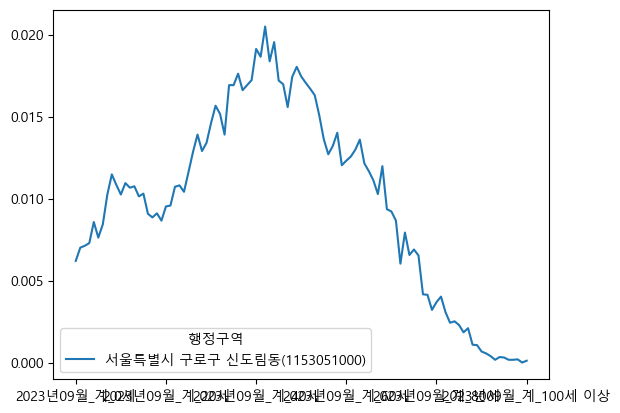

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') # 원하는 지역 이름 입력
df2 = df[df.index.str.contains(name)] #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장

# plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
df2.T.plot()
plt.show()

In [25]:
x = df.sub(df2.iloc[0], axis='columns')
x.head(3)

,2023년09월_계_0세,2023년09월_계_1세,2023년09월_계_2세,2023년09월_계_3세,2023년09월_계_4세,2023년09월_계_5세,2023년09월_계_6세,2023년09월_계_7세,2023년09월_계_8세,2023년09월_계_9세,...,2023년09월_계_91세,2023년09월_계_92세,2023년09월_계_93세,2023년09월_계_94세,2023년09월_계_95세,2023년09월_계_96세,2023년09월_계_97세,2023년09월_계_98세,2023년09월_계_99세,2023년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),-0.002156,-0.002594,-0.002502,-0.002524,-0.003469,-0.002199,-0.002466,-0.003437,-0.004415,-0.003768,...,0.000396,0.000280,0.000411,0.000135,0.000028,0.000075,-0.000029,-0.000098,0.000075,0.000048
서울특별시 종로구 (1111000000),-0.003369,-0.003658,-0.003820,-0.003551,-0.004894,-0.003501,-0.003654,-0.004700,-0.005808,-0.004865,...,0.000670,0.000652,0.000618,0.000329,0.000200,0.000225,0.000090,-0.000046,0.000114,0.000167
서울특별시 종로구 청운효자동(1111051500),-0.003133,-0.003066,-0.003090,-0.003170,-0.004192,-0.003505,-0.001770,-0.002709,-0.003939,-0.003384,...,0.000670,0.000838,0.000447,0.000367,0.000044,0.000271,0.000096,-0.000108,0.000263,0.000152


In [26]:
import numpy as np

y = np.power(x, 2)
z = y.sum(axis='columns')
z

행정구역
서울특별시  (1100000000)             0.000551
서울특별시 종로구 (1111000000)          0.001098
서울특별시 종로구 청운효자동(1111051500)     0.000512
서울특별시 종로구 사직동(1111053000)       0.000730
서울특별시 종로구 삼청동(1111054000)       0.001673
                                  ...   
제주특별자치도 서귀포시 서홍동(5013058000)    0.000644
제주특별자치도 서귀포시 대륜동(5013059000)    0.000337
제주특별자치도 서귀포시 대천동(5013060000)    0.000328
제주특별자치도 서귀포시 중문동(5013061000)    0.000305
제주특별자치도 서귀포시 예래동(5013062000)    0.002119
Length: 3862, dtype: float64

In [27]:
z.sort_values()

행정구역
서울특별시 구로구 신도림동(1153051000)        0.000000
경기도 하남시 (4145000000)              0.000092
경기도 남양주시 별내동(4136057000)          0.000099
서울특별시 영등포구 문래동(1156060500)        0.000120
충청남도 아산시 (4420000000)             0.000121
                                    ...   
경상북도 상주시 화북면서부출장소(4725042600)     0.017111
전라남도 고흥군 도양읍소록출장소(4677025400)     0.017646
인천광역시 강화군 서도면볼음출장소(2871042500)    0.018149
강원특별자치도 철원군 근북면(5178033000)       0.025050
경기도 광명시 광명1동(4121051000)          0.026560
Length: 3862, dtype: float64

In [28]:
i = z.sort_values().index[:6]
i

Index(['서울특별시 구로구 신도림동(1153051000)', '경기도 하남시 (4145000000)',
       '경기도 남양주시 별내동(4136057000)', '서울특별시 영등포구 문래동(1156060500)',
       '충청남도 아산시 (4420000000)', '서울특별시 영등포구 신길제7동(1156069000)'],
      dtype='object', name='행정구역')

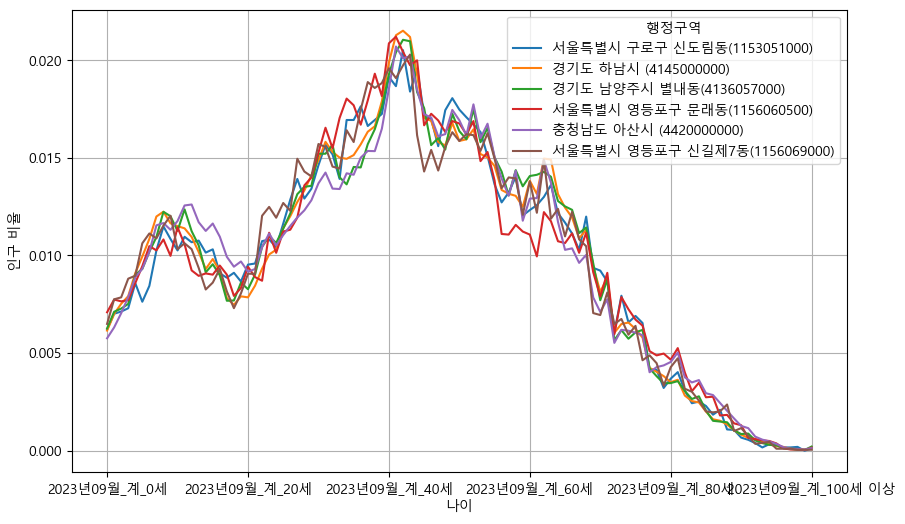

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family ='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
df.loc[i].T.plot(figsize=(10, 6))
plt.xlabel('나이')
plt.ylabel('인구 비율')
plt.grid(True)
plt.show()

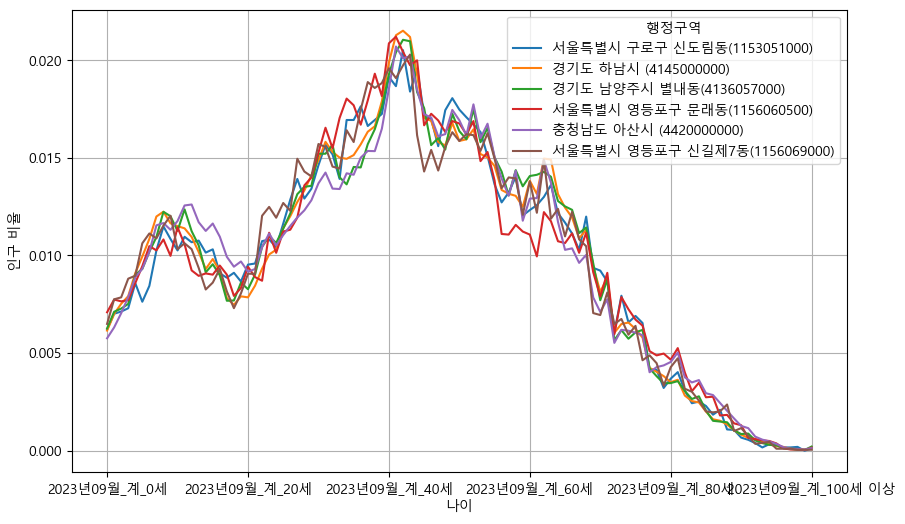

In [30]:
# 전체 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') # 원하는 지역 이름 입력
df2 = df[df.index.str.contains(name)] #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장

# 특정 지역의 인구를 빼고 
x = df.sub(df2.iloc[0], axis='columns')
y = np.power(x, 2) # 차의 제곱을 연산 
z = y.sum(axis='columns') # 결과는 시리즈로 인덱스가 행정 구역
i = z.sort_values().index[:6] # 차의 제곱이 가장 작은 6개 선택

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df.loc[i].T.plot(figsize=(10, 6))
plt.xlabel('나이')
plt.ylabel('인구 비율')
plt.grid(True)
plt.show()

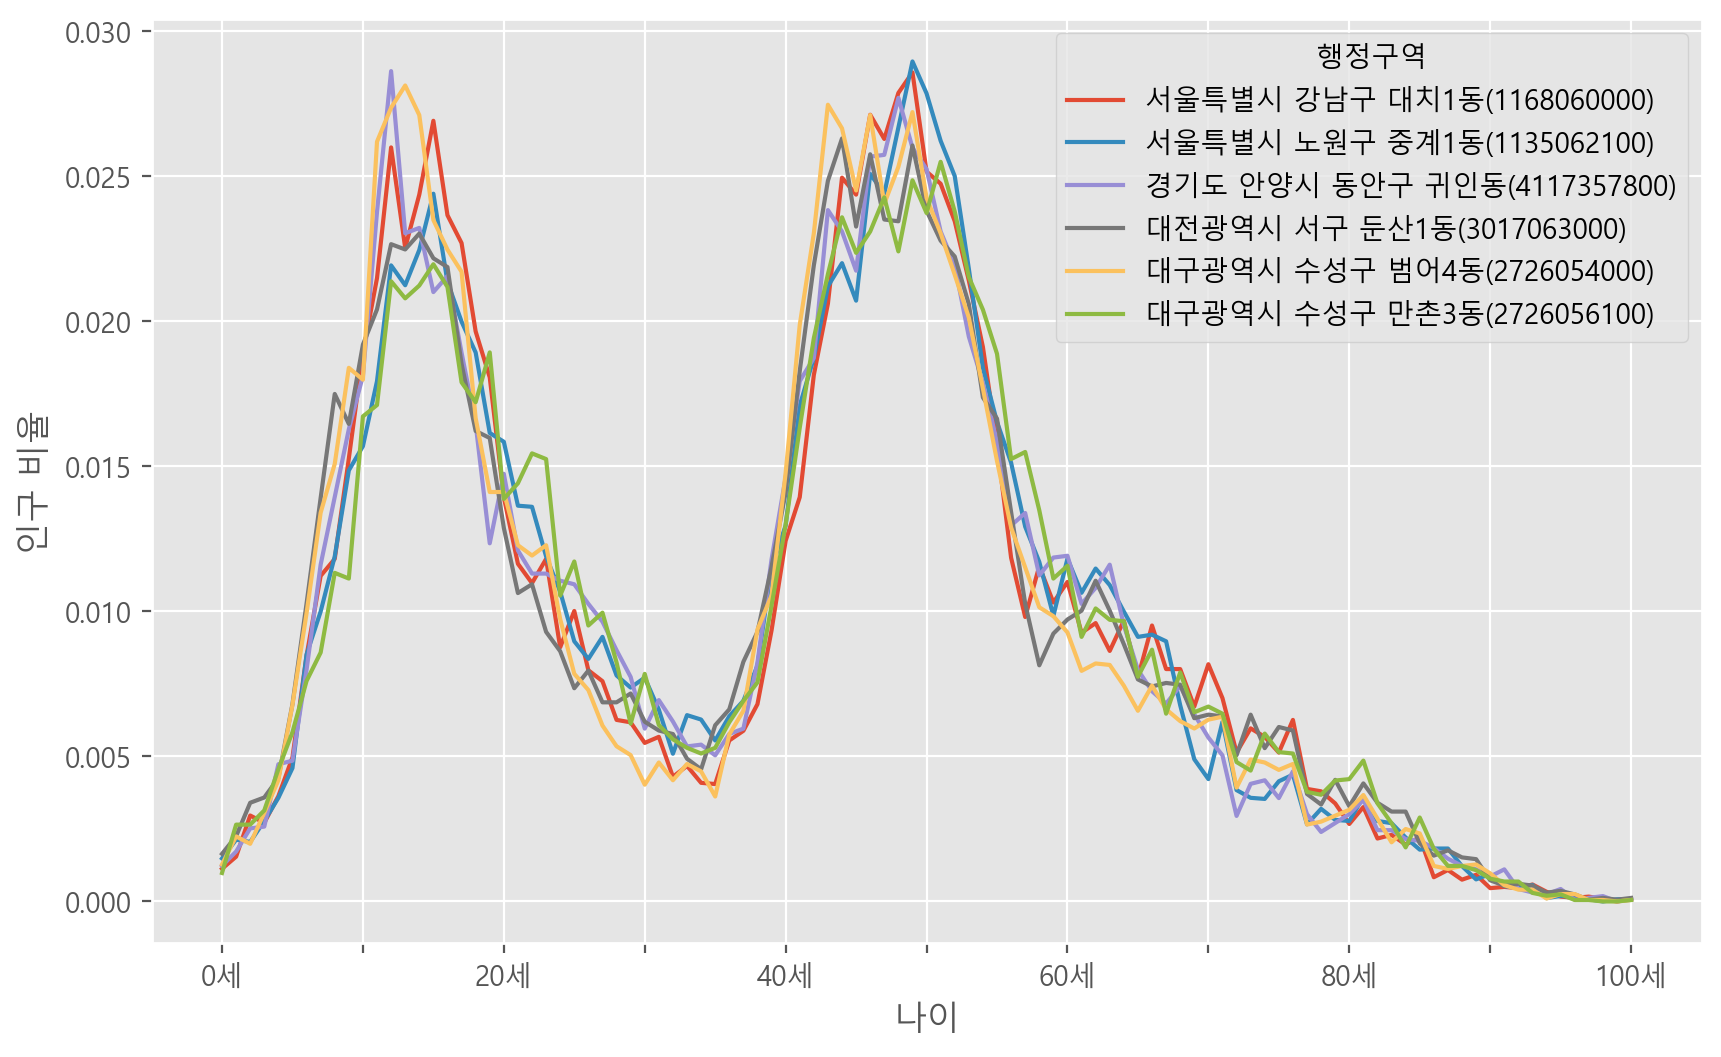

In [38]:
# 전체 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('age.csv', encoding='cp949', index_col=0)

# 콤마로 제거하고 정수로 변환 
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric)

# 총 인구수가 0인 행을 삭제 
df = df[df[df.columns[0]] != 0]

# df = df.div(df['2023년09월_계_총인구수'], axis='index')
df = df.div(df[df.columns[0]], axis='index')
del df['2023년09월_계_총인구수'], df['2023년09월_계_연령구간인구수'] 

name = input('원하는 지역의 이름을 입력해주세요 : ') # 원하는 지역 이름 입력
df2 = df[df.index.str.contains(name)] #3. 해당 행을 찾아서 해당 지역의 인구 구조를 저장

# 특정 지역의 인구를 빼고 
x = df.sub(df2.iloc[0], axis='columns')
y = np.power(x, 2) # 차의 제곱을 연산 
z = y.sum(axis='columns') # 결과는 시리즈로 인덱스가 행정 구역
i = z.sort_values().index[:6] # 차의 제곱이 가장 작은 6개 선택

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
df.columns = [f'{i}세' for i in range(101)]
df.loc[i].T.plot(figsize=(10, 6))
plt.xlabel('나이')
plt.ylabel('인구 비율')
plt.grid(True)

plt.xticks(range(0, 101, 10))
plt.show()